# Importamos la librería Pandas y cargamos el DataSet

In [11]:
import pandas as pd

# Carga del DataSet
df =  pd.read_csv("MPL_ID_S10.csv")

# Info Básica
print(df.shape) #Filas y columnas
print(df.columns) #Nombres de columnas
print(df.head()) #Primeras filas

(78, 18)
Index(['Hero', 'Hero_picked', 'T_wins', 'T_lose', 'T_winrate',
       'T_pickpercentage', 'Bs_picked', 'Bs_won', 'Bs_lost', 'Bs_winrate',
       'Rs_picked', 'Rs_won', 'Rs_lost', 'Rs_winrate', 'Hero_banned',
       'Ban_percentage', 'Pick&Ban', 'Pick&Ban percentage'],
      dtype='object')
        Hero  Hero_picked  T_wins  T_lose T_winrate T_pickpercentage  \
0    Paquito          124      61      63    49.19%           72.09%   
1  Esmeralda          108      52      56    48.15%           62.79%   
2     Claude           79      39      40    49.37%           45.93%   
3    Beatrix           78      51      27    65.38%           45.35%   
4  Valentina           64      31      33    48.44%           37.21%   

   Bs_picked  Bs_won  Bs_lost Bs_winrate  Rs_picked  Rs_won  Rs_lost  \
0         59      28       31     47.46%         65      33       32   
1         58      29       29     50.00%         50      23       27   
2         42      21       21     50.00%         37

## Algunas columnas estan en "%" como texto, habría que convertirlas a númericas

In [12]:
# Convertimos culumnas con % a float
cols_pct = ["T_winrate", "T_pickpercentage", "Bs_winrate", "Rs_winrate", "Ban_percentage" , "Pick&Ban percentage"]
for col in cols_pct:
    df[col] = (
        df[col]
        .astype(str)                       # Forzar string
        .str.replace("%", "", regex=False) # Quitar %
        .replace("-", "0")                 # Cambiar - por 0
        .astype(float)                     # Convertir a float
    )

## Heroes mas pickeados

In [13]:
df.sort_values("Hero_picked", ascending=False).head(10)

,Hero,Hero_picked,T_wins,T_lose,T_winrate,T_pickpercentage,Bs_picked,Bs_won,Bs_lost,Bs_winrate,Rs_picked,Rs_won,Rs_lost,Rs_winrate,Hero_banned,Ban_percentage,Pick&Ban,Pick&Ban percentage
0,Paquito,124,61,63,49.19,72.09,59,28,31,47.46,65,33,32,50.77,32,18.60,156,90.70
1,Esmeralda,108,52,56,48.15,62.79,58,29,29,50.00,50,23,27,46.00,33,19.19,141,81.98
2,Claude,79,39,40,49.37,45.93,42,21,21,50.00,37,18,19,48.65,36,20.93,115,66.86
3,Beatrix,78,51,27,65.38,45.35,39,21,18,53.85,39,30,9,76.92,45,26.16,123,71.51
4,Valentina,64,31,33,48.44,37.21,38,17,21,44.74,26,14,12,53.85,106,61.63,170,98.84
5,Yve,63,27,36,42.86,36.63,29,13,16,44.83,34,14,20,41.18,46,26.74,109,63.37
6,Mathilda,57,28,29,49.12,33.14,36,17,19,47.22,21,11,10,52.38,26,15.12,83,48.26
7,Chou,55,26,29,47.27,31.98,31,15,16,48.39,24,11,13,45.83,22,12.79,77,44.77
8,Lylia,53,31,22,58.49,30.81,25,14,11,56.00,28,17,11,60.71,15,8.72,68,39.53
9,Julian,50,26,24,52.00,29.07,16,7,9,43.75,34,19,15,55.88,64,37.21,114,66.28


## Winrate vs Pick Rate

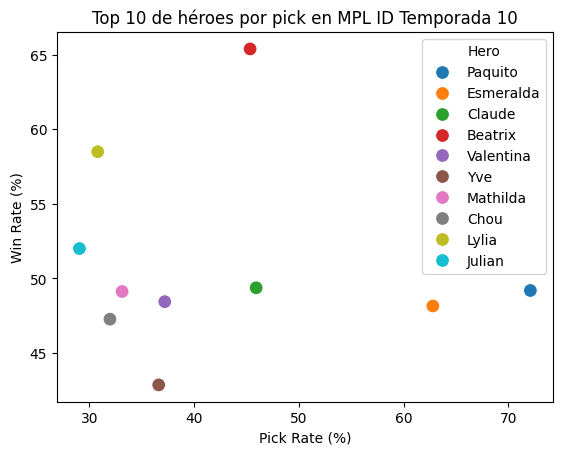

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = df.sort_values("T_pickpercentage", ascending=False).head(10)

sns.scatterplot(data=top10, x="T_pickpercentage", y="T_winrate", hue="Hero", s=100)
plt.xlabel("Pick Rate (%)")
plt.ylabel("Win Rate (%)")
plt.title("Top 10 de héroes por pick en MPL ID Temporada 10")
plt.show()

## Metricas propias

### Crea presencia en Meta = Pick% + Ban%

In [16]:
df["Presence"] = df["T_pickpercentage"] + df["Ban_percentage"]
df.sort_values("Presence", ascending=False).head(10)

,Hero,Hero_picked,T_wins,T_lose,T_winrate,T_pickpercentage,Bs_picked,Bs_won,Bs_lost,Bs_winrate,Rs_picked,Rs_won,Rs_lost,Rs_winrate,Hero_banned,Ban_percentage,Pick&Ban,Pick&Ban percentage,Presence
12,Wanwan,46,28,18,60.87,26.74,27,16,11,59.26,19,12,7,63.16,125,72.67,171,99.42,99.41
4,Valentina,64,31,33,48.44,37.21,38,17,21,44.74,26,14,12,53.85,106,61.63,170,98.84,98.84
10,Faramis,48,30,18,62.50,27.91,26,16,10,61.54,22,14,8,63.64,119,69.19,167,97.09,97.10
13,Akai,45,26,19,57.78,26.16,26,15,11,57.69,19,11,8,57.89,118,68.60,163,94.77,94.76
28,Fanny,26,9,17,34.62,15.12,19,6,13,31.58,7,3,4,42.86,131,76.16,157,91.28,91.28
0,Paquito,124,61,63,49.19,72.09,59,28,31,47.46,65,33,32,50.77,32,18.60,156,90.70,90.69
1,Esmeralda,108,52,56,48.15,62.79,58,29,29,50.00,50,23,27,46.00,33,19.19,141,81.98,81.98
3,Beatrix,78,51,27,65.38,45.35,39,21,18,53.85,39,30,9,76.92,45,26.16,123,71.51,71.51
2,Claude,79,39,40,49.37,45.93,42,21,21,50.00,37,18,19,48.65,36,20.93,115,66.86,66.86
9,Julian,50,26,24,52.00,29.07,16,7,9,43.75,34,19,15,55.88,64,37.21,114,66.28,66.28


## 🏆 Ranking de Héroes por Métricas

En este análisis vamos a generar **rankings de héroes** basados en las métricas más importantes del dataset:

- **Win Rate (%):** porcentaje de victorias de cada héroe.  
- **Pick Rate (%):** frecuencia con la que los héroes fueron elegidos.  
- **Presence (%):** suma de Pick Rate + Ban Rate, que muestra cuánta presencia tuvo un héroe en el meta.  

El objetivo es identificar:
- Los **Top 5** héroes más fuertes en cada métrica.  
- Los **Bottom 5** héroes con peores resultados.  

Esto nos ayudará a ver quiénes dominaron el meta y quiénes fueron los menos relevantes.


In [21]:
# ===============================
# 🏆 Ranking de héroes por métricas
# ===============================

# Ordenar por Win Rate
top5_win = df.sort_values("T_winrate", ascending=False).head(5)
bottom5_win = df.sort_values("T_winrate", ascending=True).head(5)

print("Top 5 Héroes por Win Rate")
print(top5_win[["Hero","T_winrate"]])
print("\n Bottom 5 Héroes por Win Rate:")
print(bottom5_win[["Hero", "T_winrate"]])

Top 5 Héroes por Win Rate
           Hero  T_winrate
67  Yi Sun-Shin      100.0
68          Yin      100.0
66       Moskov      100.0
65         Miya      100.0
64       Lesley      100.0

 Bottom 5 Héroes por Win Rate:
        Hero  T_winrate
51    Thamuz        0.0
59    Karrie        0.0
74  Belerick        0.0
75     Layla        0.0
76     Saber        0.0


In [22]:
# Ordenar por Pick Rate
top5_pick = df.sort_values("T_pickpercentage", ascending=False).head(5)
bottom5_pick = df.sort_values("T_pickpercentage", ascending=True).head(5)

print("\n🔝 Top 5 héroes por Pick Rate:")
print(top5_pick[["Hero", "T_pickpercentage"]])
print("\n⬇️ Bottom 5 héroes por Pick Rate:")
print(bottom5_pick[["Hero", "T_pickpercentage"]])


🔝 Top 5 héroes por Pick Rate:
        Hero  T_pickpercentage
0    Paquito             72.09
1  Esmeralda             62.79
2     Claude             45.93
3    Beatrix             45.35
4  Valentina             37.21

⬇️ Bottom 5 héroes por Pick Rate:
         Hero  T_pickpercentage
75      Layla              0.00
74   Belerick              0.00
77     Zilong              0.00
76      Saber              0.00
63  Lapu-Lapu              0.58


In [23]:
# Ordenar por Presencia (Pick + Ban)
df["Presence"] = df["T_pickpercentage"] + df["Ban_percentage"]

top5_presence = df.sort_values("Presence", ascending=False).head(5)
bottom5_presence = df.sort_values("Presence", ascending=True).head(5)

print("\n🔝 Top 5 héroes por Presencia (Pick + Ban):")
print(top5_presence[["Hero", "Presence"]])
print("\n⬇️ Bottom 5 héroes por Presencia (Pick + Ban):")
print(bottom5_presence[["Hero", "Presence"]])


🔝 Top 5 héroes por Presencia (Pick + Ban):
         Hero  Presence
12     Wanwan     99.41
4   Valentina     98.84
10    Faramis     97.10
13       Akai     94.76
28      Fanny     91.28

⬇️ Bottom 5 héroes por Presencia (Pick + Ban):
         Hero  Presence
63  Lapu-Lapu      0.58
70     Harith      0.58
69       Gloo      0.58
77     Zilong      0.58
75      Layla      0.58


## 🤖 Clustering de héroes con K-Means

En este análisis aplicamos el algoritmo de **K-Means Clustering** para agrupar héroes según sus estadísticas clave:
- Win Rate (%)
- Pick Rate (%)
- Ban Rate (%)
- Presencia (Pick + Ban)

El objetivo es identificar arquetipos de héroes:
- **Meta OP:** mucho pick y ban, winrate alto.  
- **Niche picks:** poco usados pero con buen rendimiento.  
- **Outsiders:** poco pick y winrate bajo.  


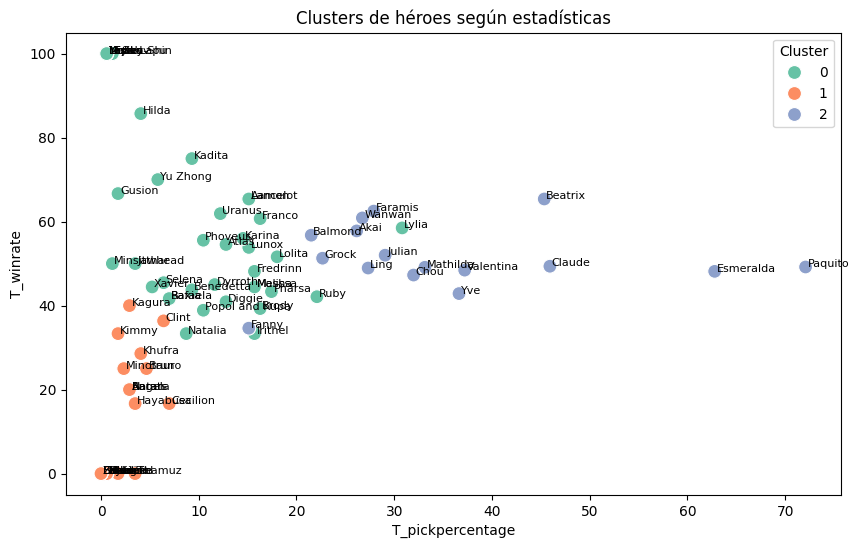

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Variables para clustering
X = df[["T_winrate","T_pickpercentage","Ban_percentage","Presence"]]

# Escalamos los datos (importante para clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Probar con 3 clusters (puedes variar k)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizar clusters en 2D (ej: Pick% vs Winrate)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="T_pickpercentage", y="T_winrate", hue="Cluster", palette="Set2", s=100)
for i in range(df.shape[0]):
    plt.text(df["T_pickpercentage"].iloc[i]+0.2, df["T_winrate"].iloc[i], df["Hero"].iloc[i], fontsize=8)
plt.title("Clusters de héroes según estadísticas")
plt.show()

## 🔮 Clasificación de héroes en Meta vs No Meta

Definimos como **Meta** a un héroe con:
- Presencia (Pick% + Ban%) mayor al 20%  
- y Win Rate mayor al 50%

Creamos una etiqueta binaria (`Meta = 1`, `No Meta = 0`) y entrenamos un modelo simple de **Logistic Regression** para ver si podemos predecir esta categoría a partir de las métricas.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definir variable objetivo
df["Meta"] = ((df["Presence"] > 20) & (df["T_winrate"] > 50)).astype(int)

# Features y target
X = df[["T_winrate","T_pickpercentage","Ban_percentage"]]
y = df["Meta"]

# Split de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Reporte
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.60      0.60      0.60         5

    accuracy                           0.83        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.83      0.83      0.83        24

Matriz de confusión:
 [[17  2]
 [ 2  3]]


Precision (precisión):
De todos los héroes que el modelo dijo que eran "Meta", ¿cuántos realmente lo eran?

Para No Meta (0): 0.89 → el modelo casi no se equivoca al decir que alguien no es meta.

Para Meta (1): 0.60 → el modelo se confunde bastante al decir que alguien es meta.

Recall (sensibilidad):
De todos los héroes que realmente eran "Meta", ¿cuántos identificó bien el modelo?

0.60 → solo 60% de los héroes meta fueron detectados como tal.

F1-score:
Promedio entre precisión y recall → mide el equilibrio.

0.60 para Meta → tu modelo detecta a algunos héroes meta, pero no a todos.

Support: cuántos ejemplos había.

19 héroes no meta, 5 meta.